# Lesson 3: MatplotLib

Data visualization is a critical skill in any sort of knowledge-work (scientific research, industry, etc.) and having convincing/informative graphics is (almost) as important as having a rigorous analysis. After all, if you cannot communicate your work effectively, what worth is it?

We will talk about using matplotlib to perform our data visualization. While there exist other extensions to do certain types of visualization (like 3d, or interactive), for most things basic matplotlib will be sufficient.

In [2]:
import matplotlib.pylab as plt

Note! If this returns an error message you might have to use your package manager to install it. Such as;

> pip install matplotlib

Personally, I find matplotlib a very tricky module to use. I highly recommend using google to help you find plots that look similar to those you want to build. One particularly useful resource is their [official gallery](https://matplotlib.org/gallery.html) which shows off many of the possible plots.

For inline plots in Jupyter notebooks one has to activate a "magic command"...

In [3]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# The basic plot...

Here we create a simple two dimensional plot.

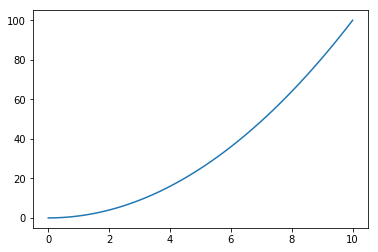

In [4]:
import numpy as np #matplotlib can deal well with numpy arrays

x = np.linspace(0,10,100)
y = x**2

plt.plot(x,y)
plt.show()

All good plots should have a two critical things...

1) X and Y labels with units.

2) A legend to show what each curve is.

There are two optional things which I find generally useful...

3) A top title

4) Grid lines for easily reading off datapoints

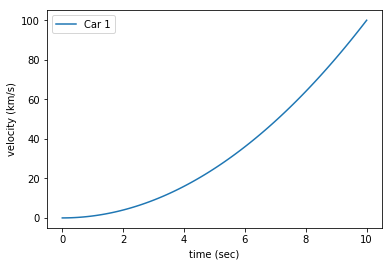

In [5]:
plt.plot(x,y,label="Car 1")
plt.xlabel("time (sec)")
plt.ylabel("velocity (km/s)")
plt.legend()
plt.show()

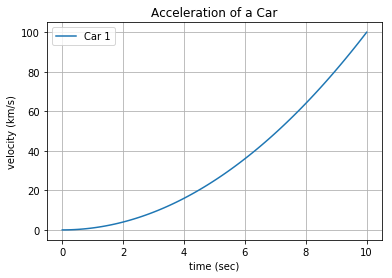

In [6]:
plt.plot(x,y,label="Car 1")
plt.xlabel("time (sec)")
plt.ylabel("velocity (km/s)")
plt.title("Acceleration of a Car")
plt.legend()
plt.grid()
plt.show()

We can save figures in a variety of formats (png/jpeg/pdf). I personally prefer PDFs since they are vectorize and won't get pixelized when you expand them...

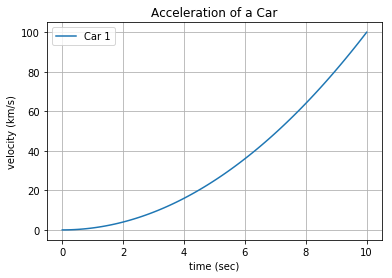

In [7]:
plt.plot(x,y,label="Car 1")
plt.xlabel("time (sec)")
plt.ylabel("velocity (km/s)")
plt.title("Acceleration of a Car")
plt.legend()
plt.grid()
plt.savefig("car.pdf")

## Common Customizations

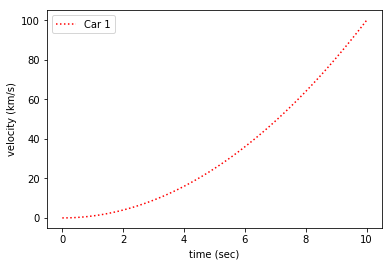

In [8]:
plt.plot(x,y,"r:",label="Car 1") #changing color and line style
plt.xlabel("time (sec)")
plt.ylabel("velocity (km/s)")
plt.legend()
plt.show()

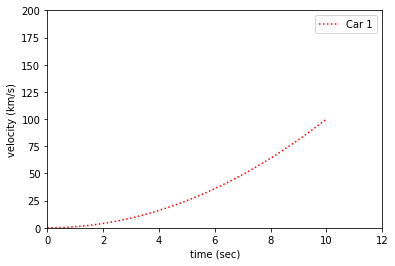

In [9]:
plt.plot(x,y,"r:",label="Car 1")
plt.xlabel("time (sec)")
plt.ylabel("velocity (km/s)")
plt.legend()
plt.xlim(0,12) #specifying x range
plt.ylim(0,200) #specifiying y range
plt.show()

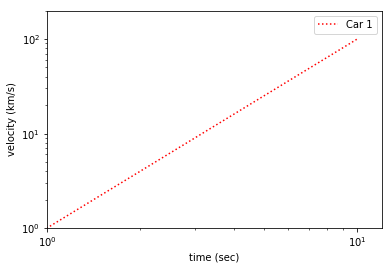

In [10]:
plt.loglog(x,y,"r:",label="Car 1") #changing to logscale
plt.xlabel("time (sec)") 
plt.ylabel("velocity (km/s)")
plt.legend()
plt.xlim(1,12) #note that you should specify non-zero starting point since log(0) is undefined
plt.ylim(1,200) #note that you should specify non-zero starting point since log(0) is undefined
plt.show()

## Subplots

This is definitely something I will often google examples...

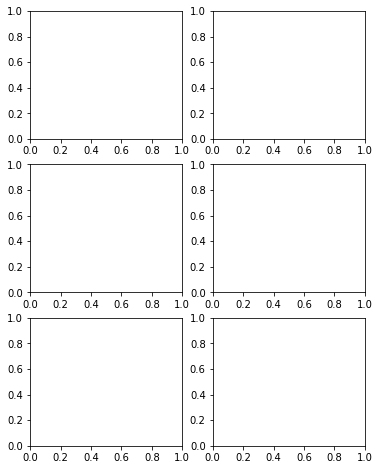

In [11]:

fig, axes = plt.subplots(3,2,figsize=(6,8)) #3 by 2 subfigures which is 8 by 6 units 
#(not super important the units sicne you can scale the figure without loss due to vector nature)

In [12]:
axes[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x110e7c2e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1146834e0>], dtype=object)

0 [<matplotlib.axes._subplots.AxesSubplot object at 0x11471cc88>
1 [<matplotlib.axes._subplots.AxesSubplot object at 0x114837fd0>
2 [<matplotlib.axes._subplots.AxesSubplot object at 0x1148b44a8>


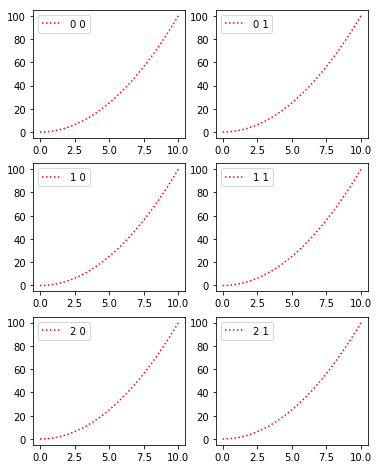

In [13]:
fig, axes = plt.subplots(3,2,figsize=(6,8)) #3 by 2 subfigures which is 8 by 6 units 

for n,i in enumerate(axes):
    print(n, i)
    for m,j in enumerate(i):
        j.plot(x,y,"r:",label=str(n)+ " " + str(m))
        j.legend()
plt.show()

In [14]:
# Example from Nick Kern

# generate x-data
time = np.linspace(0, 1, 50)

# generate y-data
freq1 = 2 * np.pi * 1   # 2pi
freq2 = 2 * np.pi * 2   # 4pi
freq3 = 2 * np.pi * 3   # 6pi

y1 = np.sin(freq1*time)
y2 = np.sin(freq2*time)
y3 = np.sin(freq3*time)

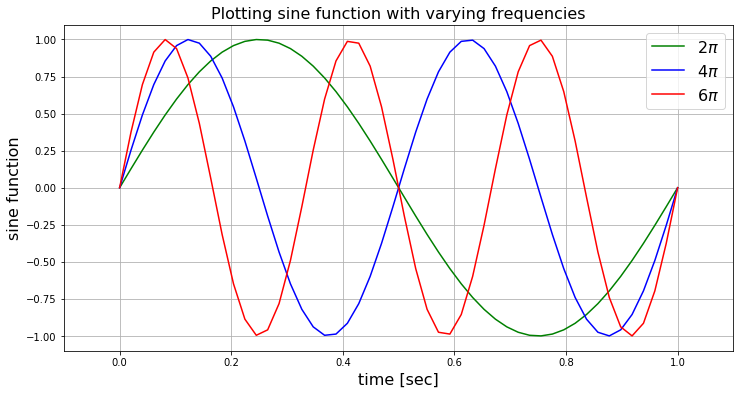

In [15]:
fig = plt.figure(figsize=(12,6))

# make a single subplot
ax = fig.add_subplot(1, 1, 1)

# create background grid
ax.grid(True)

# plot cosine as lines, no points, collect output of function
# note the data aren't continuous, it's just a plotting illusion
p1 = ax.plot(time, y1, color='green')
p2 = ax.plot(time, y2, color='blue')
p3 = ax.plot(time, y3, color='red')

# set x and y limits
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-1.1, 1.1)

# set x and y labels
ax.set_xlabel('time [sec]', fontsize=16)
ax.set_ylabel('sine function', fontsize=16)

# set title
ax.set_title('Plotting sine function with varying frequencies', fontsize=16)

# create legend
ax.legend([p1[0], p2[0], p3[0]], ['$2\pi$', '$4\pi$', '$6\pi$'], fontsize=16) #Note you can use LaTeX as labels


## Other types of plots

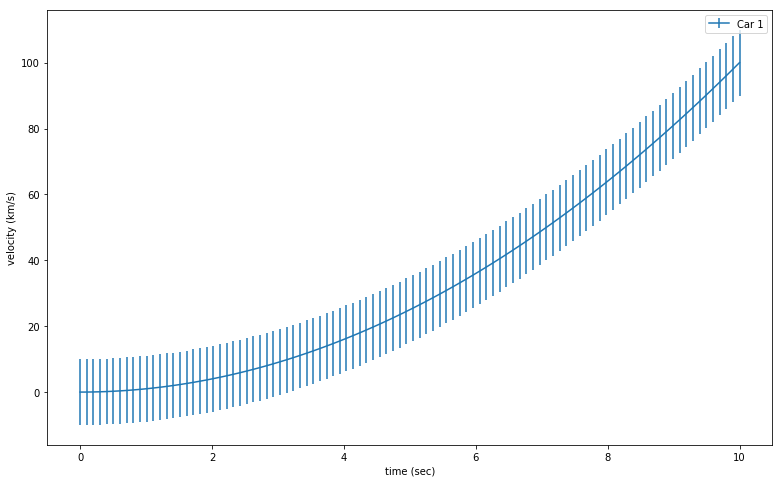

In [16]:
# Error Bar Plot
plt.figure(figsize=(13,8))

plt.errorbar(x,y,10,label="Car 1") #changing color and line style
plt.xlabel("time (sec)")
plt.ylabel("velocity (km/s)")
plt.legend()
plt.show()

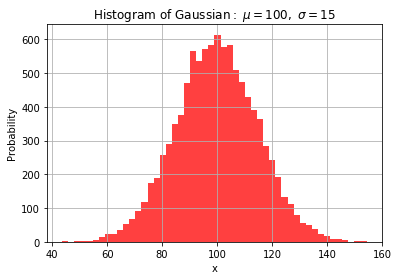

In [17]:
mu, sigma = 100, 15 #standard deviation
x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50,  facecolor='red', alpha=0.75)

# add a 'best fit' line


plt.xlabel('x')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Gaussian:}\ \mu=100,\ \sigma=15$')
plt.grid(True)

plt.show()

# 2d data

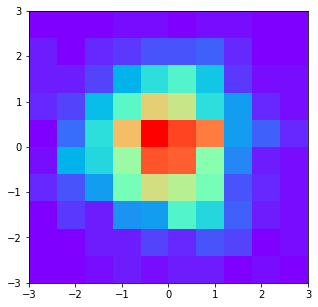

In [18]:
# 2d Histogram

draws = np.array([ np.random.normal(0, 1, 1000), np.random.normal(0, 1, 1000) ])
plt.figure(figsize=(5,5))

# 2dhist
_ = plt.hist2d(draws[0], draws[1], bins=10, cmap='rainbow', range=([-3,3],[-3,3])) #supressing output of something __


In [19]:
# 2d function

X, Y = np.meshgrid(np.linspace(-10,10,20), np.linspace(-10,10,20)) #Selecting our X/Y grid points to evaluate func

Z= np.cos(np.sqrt( X**2 + 2* Y**2 )) #Random Complicated 2d Function


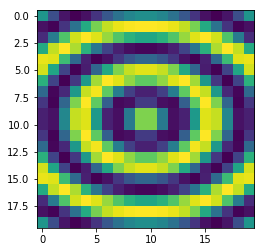

In [20]:
plt.imshow(Z)

## Dealing with image data...

Often times we will want to analyze data in image form (like say a telescope!) 

Here is a very famous image from the Hubble Space Telescope...

![image](./Crab_Nebula.png)


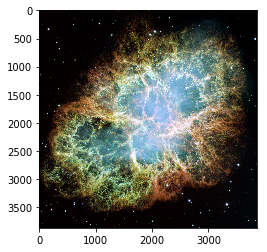

In [28]:
import matplotlib.image as mpimg

img = mpimg.imread('./Crab_Nebula.png')

imshow(img)

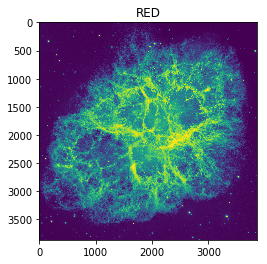

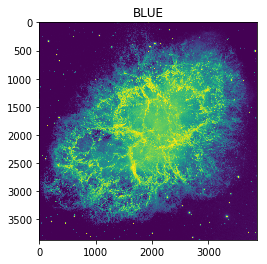

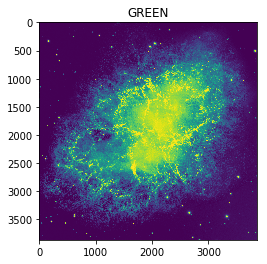

In [22]:
labels = ["RED","BLUE","GREEN"]
for i in range(0,3):
    imshow(img[:,:,i])
    plt.title(labels[i])
    plt.show()

## Other Plotting Packages

As referenced earlier, there are many additional packages to plot things in Python, often powered by matplotlib underneith. Here I mention one of my favorites which I find is very useful when dealing with large multidimensional datasets with complex statistics; Corner!

See examples [here](https://corner.readthedocs.io/en/latest/)

In [23]:
import corner

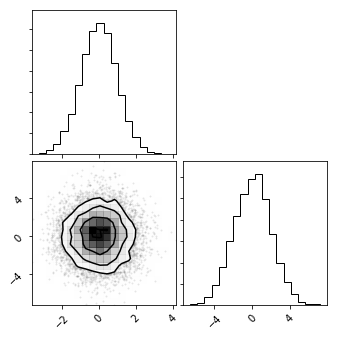

In [24]:

ndim, nsamples = 2, 10000

draws = np.array([ np.random.normal(0, 1, nsamples), 2*np.random.normal(0, 1, nsamples) ]).transpose()

figure = corner.corner(draws)

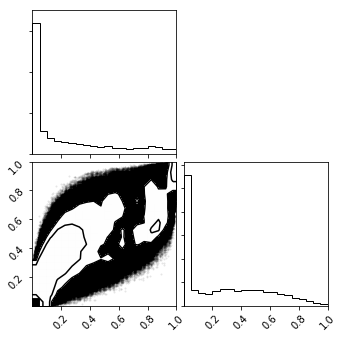

In [25]:
draws = np.array([img[:,:,2].flatten(),img[:,:,0].flatten()]).transpose()
figure = corner.corner(draws)